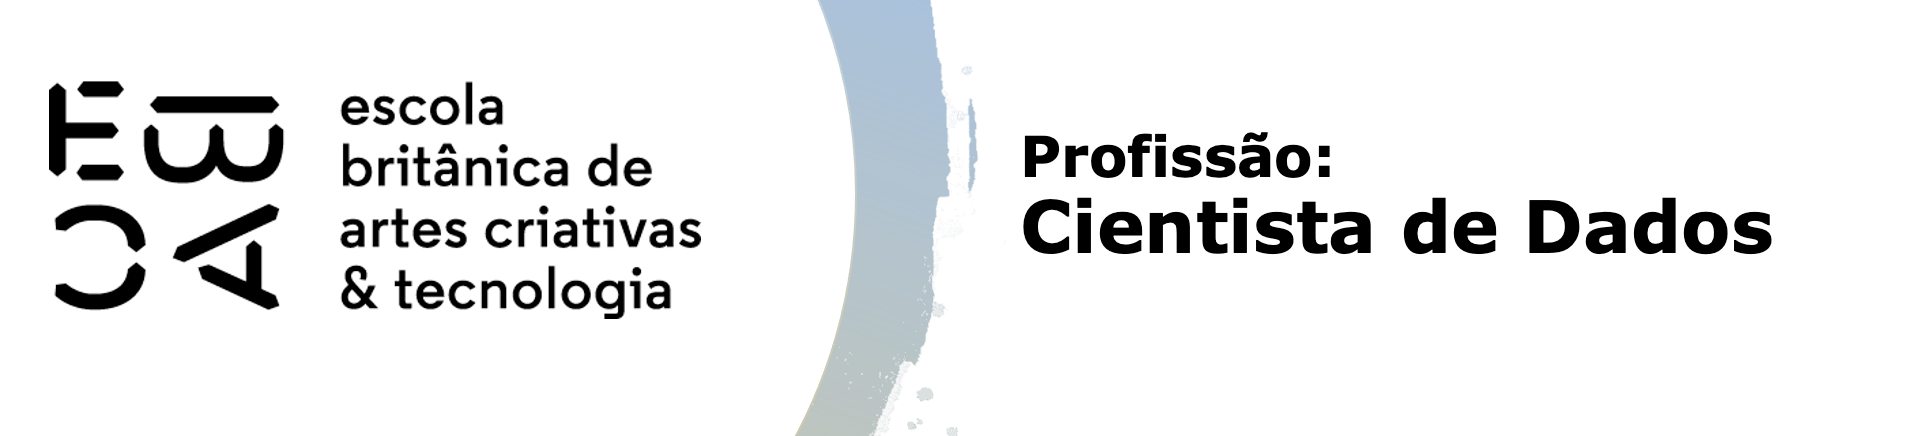

# Rodrigo Schulz

In [28]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [17]:
pg = sns.load_dataset('penguins')

In [18]:
pg.groupby('sex')['body_mass_g'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,165.0,3862.272727,666.172050,2700.0,3350.0,3650.0,4550.0,5200.0
Male,168.0,4545.684524,787.628884,3250.0,3900.0,4300.0,5312.5,6300.0


<Axes: xlabel='sex', ylabel='body_mass_g'>

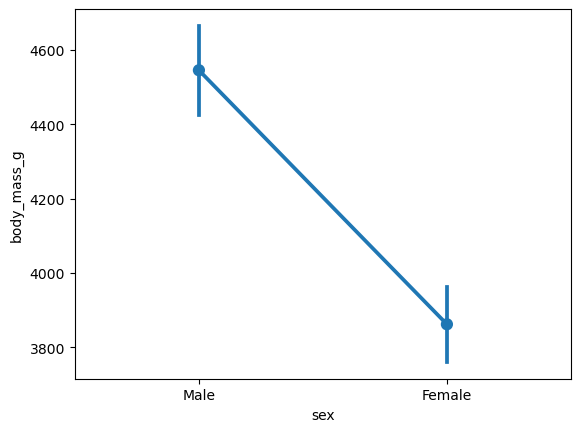

In [4]:
sns.pointplot(data=pg, x='sex', y = 'body_mass_g')

## 1) Diferença de peso entre machos e fêmeas

Na base de pinguins, podemos ver que há diferença de peso entre machos e fêmeas. Mas será que é uma conclusão extrapolável a toda a população de pinguins? Assumindo que essa amostra é aleatória e representativa da população de pinguins, realize um teste T com 5% de significância para verificar se podemos induzir esta conclusão para a população toda.

In [7]:
# Dados para machos
n_male = 168
mean_male = 4545.684524
std_male = 787.628884

# Dados para fêmeas
n_female = 165
mean_female = 3862.272727
std_female = 666.172050

# Calculando a estatística t
numerator = mean_male - mean_female
denominator = np.sqrt((std_male**2 / n_male) + (std_female**2 / n_female))
t_statistic = numerator / denominator

# Graus de liberdade
df = n_male + n_female - 2

# Calculando o valor p (two-tailed)
p_value = 2 * (1 - t.cdf(np.abs(t_statistic), df=df))

# Nível de significância
alpha = 0.05

# Tomando uma decisão com base no valor p
if p_value < alpha:
    conclusion = "Rejeitar a hipótese nula. Há uma diferença significativa de peso entre machos e fêmeas."
else:
    conclusion = "Não rejeitar a hipótese nula. Não há evidências suficientes de diferença significativa de peso."

print("Estatística t:", t_statistic)
print("Valor p:", p_value)
print("Conclusão:", conclusion)

Estatística t: 8.5545372353394
Valor p: 4.440892098500626e-16
Conclusão: Rejeitar a hipótese nula. Há uma diferença significativa de peso entre machos e fêmeas.


## 2) Representação gráfica do teste

Siga os passos da aula para você poder visualizar a estatística do teste, sua distribuição e a região crítica do teste.

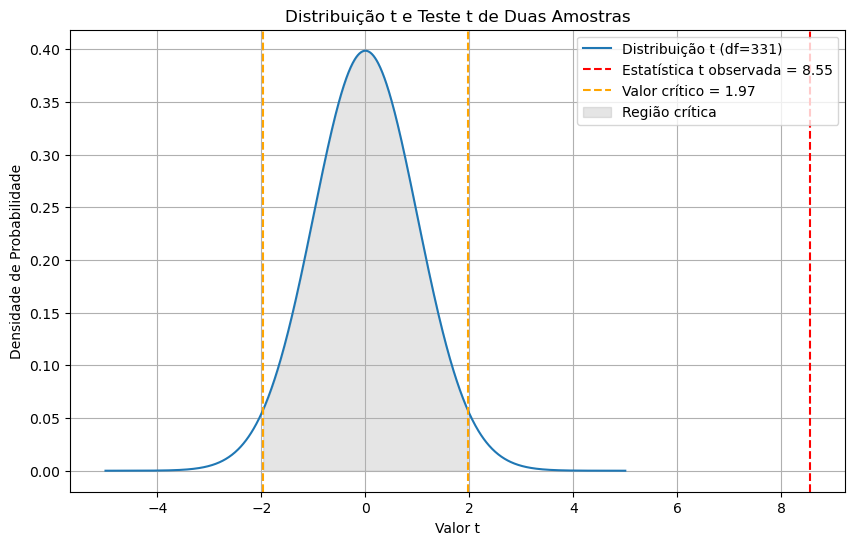

In [9]:
# Intervalo de valores t para plotagem
t_values = np.linspace(-5, 5, 1000)

# Distribuição t de Student
t_dist = t.pdf(t_values, df)

# Plot da distribuição t
plt.figure(figsize=(10, 6))
plt.plot(t_values, t_dist, label=f'Distribuição t (df={df})')
plt.axvline(x=t_statistic, color='red', linestyle='--', label=f'Estatística t observada = {t_statistic:.2f}')
plt.axvline(x=t.ppf(1 - alpha/2, df=df), color='orange', linestyle='--', label=f'Valor crítico = {t.ppf(1 - alpha/2, df=df):.2f}')
plt.axvline(x=-t.ppf(1 - alpha/2, df=df), color='orange', linestyle='--')
plt.fill_between(t_values, t_dist, where=(t_values >= -t.ppf(1 - alpha/2, df=df)) & (t_values <= t.ppf(1 - alpha/2, df=df)), color='gray', alpha=0.2, label='Região crítica')
plt.title('Distribuição t e Teste t de Duas Amostras')
plt.xlabel('Valor t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()

## 3) Considere as espécies

Repita o exercício I, uma vez para cada espécie de pinguim. Qual é o *p-value* associado a cada raça?

In [21]:
df = pg
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [29]:
pg = df

# Realizar o teste t para cada espécie
unique_species = df['species'].unique()

for species in unique_species:
    df_species = df[df['species'] == species]
    
    # Dados para machos e fêmeas da espécie atual
    male_data = df_species[df_species['sex'] == 'Male']['body_mass_g']
    female_data = df_species[df_species['sex'] == 'Female']['body_mass_g']
    
    # Realizar o teste t
    t_statistic, p_value = ttest_ind(male_data, female_data)
    
    # Nível de significância
    alpha = 0.05
    
    # Tomando uma decisão com base no valor p
    if p_value < alpha:
        conclusion = f"Rejeitar a hipótese nula. Há uma diferença significativa de peso entre machos e fêmeas da espécie {species}."
    else:
        conclusion = f"Não rejeitar a hipótese nula. Não há evidências suficientes de diferença significativa de peso na espécie {species}."
    
    print(f"Espécie: {species}")
    print("Estatística t:", t_statistic)
    print("Valor p:", p_value)
    print("Conclusão:", conclusion)
    print()


Espécie: Adelie
Estatística t: 13.126285923485874
Valor p: 2.2206436307866114e-26
Conclusão: Rejeitar a hipótese nula. Há uma diferença significativa de peso entre machos e fêmeas da espécie Adelie.

Espécie: Chinstrap
Estatística t: 5.20773384899266
Valor p: 2.043956471470739e-06
Conclusão: Rejeitar a hipótese nula. Há uma diferença significativa de peso entre machos e fêmeas da espécie Chinstrap.

Espécie: Gentoo
Estatística t: 14.721676481405709
Valor p: 2.133687602018886e-28
Conclusão: Rejeitar a hipótese nula. Há uma diferença significativa de peso entre machos e fêmeas da espécie Gentoo.

